In [5]:
%pylab inline

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd

import math

# GTCAT 1.0243452741896227e-35  6.783443    0.002612    1175    75  _;***********
GM_kmer_list = "/storage/pandaman/project/AgentBind-GM12878-analysis/results/c/STAT3+GM12878/kmer_ranking.txt"

# TTCCG 3.2239774966083482e-27  7.146642    0.002659    805 54
CD_kmer_list = "/storage/pandaman/project/AgentBind-IMPACT/results-c40/c/Stat3/kmer_ranking.txt"

GM = pd.read_csv(GM_kmer_list, sep="\t", names=["kmer","pval","OR","weight"], usecols=range(4))
CD = pd.read_csv(CD_kmer_list, sep="\t", names=["kmer","pval","OR","weight"], usecols=range(4))
data = pd.merge(GM, CD, on=["kmer"], suffixes=("_GM","_C4"))

Populating the interactive namespace from numpy and matplotlib


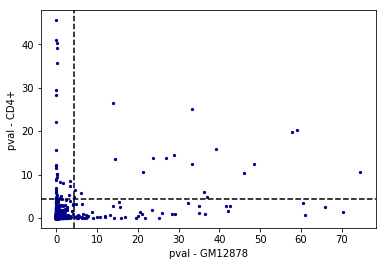

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(-1*np.log10(data["pval_GM"]), -1*np.log10(data["pval_C4"]), color="darkblue", s=5)
ax.axvline(x=-1*np.log10(0.05/data.shape[0]), color="black", linestyle="dashed");
ax.axhline(y=-1*np.log10(0.05/data.shape[0]), color="black", linestyle="dashed");
ax.set_xlabel("pval - GM12878")
ax.set_ylabel("pval - CD4+");
fig.savefig("GM_vs_C4_Stat3_kmers.pdf")

In [26]:
data[(data["pval_GM"]<10e-5) & (data["pval_C4"]>10e-5)].sort_values("pval_GM").head(n=30)

,kmer,pval_GM,OR_GM,weight_GM,pval_C4,OR_C4,weight_C4
15,TGAAA,6.023128e-71,6.028119,0.002262,0.040552,1.502863,0.000951
7,GTTTC,1.264583e-66,7.424126,0.002699,0.003569,1.872532,0.001139
20,TTTCA,1.043367e-61,5.565024,0.002157,0.269264,1.185037,0.000866
5,AGTCA,3.817091e-61,7.731700,0.002673,0.000375,2.326783,0.001065
13,TGAGT,1.869306e-43,6.211701,0.002161,0.002064,2.066325,0.000858
14,TGACT,7.787076e-43,6.175735,0.002137,0.028785,1.694048,0.001003
6,GAGTC,2.595229e-42,7.621698,0.002501,0.001882,2.043063,0.000953
8,GACTC,3.575790e-37,7.289349,0.002298,0.136220,1.384362,0.000853
19,GAAGT,9.263327e-36,5.619543,0.002218,0.002078,2.025958,0.001223
9,GTCAT,1.024345e-35,6.783443,0.002612,0.086341,1.664312,0.001129


Populating the interactive namespace from numpy and matplotlib


(0, 12)

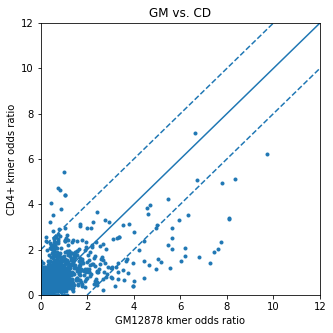

In [8]:
%pylab inline

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

import math

# GTCAT 1.0243452741896227e-35  6.783443    0.002612    1175    75  _;***********
GM_kmer_list = "/storage/pandaman/project/AgentBind-GM12878-analysis/results/c/STAT3+GM12878/kmer_ranking.txt"

# TTCCG 3.2239774966083482e-27  7.146642    0.002659    805 54
CD_kmer_list = "/storage/pandaman/project/AgentBind-IMPACT/results-c40/c/Stat3/kmer_ranking.txt"

def read_from_kmer_list(path):
    kmer_dict = {}
    rank = 0
    for line in open(path):
        rank += 1
        elems = line.split("\t")
        kmer = elems[0]
        pval = float(elems[1])
        odds_ratio = float(elems[2])
        weight = float(elems[3])
        kmer_dict[kmer] = odds_ratio
    return kmer_dict

GM_kmer_dict = read_from_kmer_list(GM_kmer_list)
CD_kmer_dict = read_from_kmer_list(CD_kmer_list)

x_GM = []
y_CD = []
for kmer in GM_kmer_dict:
    if (GM_kmer_dict[kmer] >= 0) or (CD_kmer_dict[kmer] >= 0):
        x_GM.append(GM_kmer_dict[kmer])
        y_CD.append(CD_kmer_dict[kmer])

f_scatter = "./x_GM_vs_y_CD.png"

fig = plt.figure()
fig.set_size_inches((5, 5))
ax = fig.add_subplot(111)
ax.scatter(x_GM, y_CD, marker=".")
ax.set_title("GM vs. CD")
ax.set_xlabel('GM12878 kmer odds ratio')
ax.set_ylabel('CD4+ kmer odds ratio')
((xmin,xmax), (ymin,ymax)) = ((0, 12), (0, 12))
ax.add_line(matplotlib.lines.Line2D([xmin,xmax], [ymin,ymax]))
ax.add_line(matplotlib.lines.Line2D([xmin,xmax], [ymin-2,ymax-2], ls = "--"))
ax.add_line(matplotlib.lines.Line2D([xmin,xmax], [ymin+2,ymax+2], ls = "--"))
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
#plt.show()
#plt.savefig(f_scatter)
#plt.close()